<a href="https://colab.research.google.com/github/mann09/cds_mini_projects/blob/main/M2_MiniProject_3_Emotion_Classification_from_Speech.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Mini-Project: Speech Emotion Classification

## Problem Statement

Build a model to recognize emotion from speech using Ensemble learning

## Learning Objectives

At the end of the mini-project, you will be able to :

* extract the features from audio data
* implement ML classification algorithms individually and as Ensembles, to classify emotions
* record the voice sample and test it with trained model

## Dataset

**TESS Dataset**

The first dataset chosen for this mini-project is the [TESS](https://dataverse.scholarsportal.info/dataset.xhtml?persistentId=doi:10.5683/SP2/E8H2MF) (Toronto emotional speech set) dataset. It contains 2880 files.  A set of 200 target words were spoken in the carrier phrase "Say the word _____' by two actresses and the sets were recorded in seven different emotions (anger, disgust, fear, happiness, pleasant surprise, sadness, and neutral). Both actresses spoke English as their first language, were university educated, and had musical training. Audiometric testing indicated that both actresses had thresholds within the normal range.

**Ravdess Dataset**

The second dataset chosen for this mini-project is [Ravdess](https://zenodo.org/record/1188976#.YLczy4XivIU) (The Ryerson Audio-Visual Database of Emotional Speech and Song). This dataset contains 1440 files: 60 trials per actor x 24 actors = 1440. The RAVDESS contains 24 professional actors (12 female, 12 male), vocalizing two lexically-matched statements in a neutral North American accent. Speech emotions includes calm, happy, sad, angry, fearful, surprise, and disgust expressions. Each expression is produced at two levels of emotional intensity (normal, strong), with an additional neutral expression.

**File naming convention**

Each of the 1440 files has a unique filename. The filename consists of a 7-part numerical identifier (e.g., 03-01-06-01-02-01-12.wav). These identifiers define the stimulus characteristics:

**Filename identifiers**

* Modality (01 = full-AV, 02 = video-only, 03 = audio-only).
* Vocal channel (01 = speech, 02 = song).
* Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised).
* Emotional intensity (01 = normal, 02 = strong). NOTE: There is no strong intensity for the 'neutral' emotion.
* Statement (01 = "Kids are talking by the door", 02 = "Dogs are sitting by the door").
* Repetition (01 = 1st repetition, 02 = 2nd repetition).
* Actor (01 to 24. Odd numbered actors are male, even numbered actors are female).

Filename example: `03-01-06-01-02-01-12.wav`

    - Audio-only - 03
    - Speech - 01
    - Fearful - 06
    - Normal intensity - 01
    - Statement "dogs" - 02
    - 1st Repetition - 01
    - 12th Actor - 12 Female, as the actor ID number is even.

## Information

**Speech Emotion Recognition (SER)** is the task of recognizing the emotion from  speech, irrespective of the semantics. Humans can efficiently perform this task as a natural part of speech communication, however, the ability to conduct it automatically using programmable devices is a field of active research.

Studies of automatic emotion recognition systems aim to create efficient, real-time methods of detecting the emotions of mobile phone users, call center operators and customers, car drivers, pilots, and many other human-machine communication users. Adding emotions to machines forms an important aspect of making machines appear and act in a human-like manner

Lets gain familiarity with some of the audio based features that are commonly used for SER.

**Mel scale** — The mel scale (derived from the word *melody*) is a perceptual scale of pitches judged by listeners to be equal in distance from one another. The reference point between this scale and normal frequency measurement is defined by assigning a perceptual pitch of 1000 mels to a 1000 Hz tone, 40 dB above the listener's threshold. Above about 500 Hz, increasingly large intervals are judged by listeners to produce equal pitch increments. Refer [here](https://towardsdatascience.com/learning-from-audio-the-mel-scale-mel-spectrograms-and-mel-frequency-cepstral-coefficients-f5752b6324a8) for more detailed information.

**Pitch** — how high or low a sound is. It depends on frequency, higher pitch is high frequency

**Frequency** — speed of vibration of sound, measures wave cycles per second

**Chroma** — Representation for audio where spectrum is projected onto 12 bins representing the 12 distinct semitones (or chroma). Computed by summing the log frequency magnitude spectrum across octaves.

**Fourier Transforms** — used to convert from time domain to frequency domain. Time domain shows how signal changes over time. Frequency domain shows how much of the signal lies within each given frequency band over a range of frequencies

**Librosa**

[Librosa](https://librosa.org/doc/latest/index.html) is a Python package, built for speech and audio analytics. It provides modular functions that simplify working with audio data and help in achieving a wide range of applications such as identification of the personal characteristics of different individuals' voice samples, detecting emotions from audio samples etc.

For further details on the Librosa package, refer [here](https://conference.scipy.org/proceedings/scipy2015/pdfs/brian_mcfee.pdf).


## Grading = 10 Points

In [ ]:
#@title Download the datasets and install packages
!wget -qq https://cdn.iisc.talentsprint.com/CDS/MiniProjects/Ravdess_Tess.zip
!unzip -qq Ravdess_Tess.zip
# Install packages
!pip -qq install librosa soundfile
!pip -qq install wavio
print("Datasets downloaded successfully!")

Datasets downloaded successfully!


### Import Neccesary Packages

In [ ]:
import librosa
import librosa.display
import soundfile
import os, glob, pickle
import numpy as np
import pandas as pd
import IPython.display as ipd
from matplotlib import pyplot as plt
from datetime import datetime
from IPython.display import Javascript
from google.colab import output
from base64 import b64decode
import warnings
warnings.filterwarnings('ignore')
# sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import tree
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

### Work-Flow

* Load the TESS audio data and extract features and labels

* Load the Ravdess audio data and extract features

* Combine both the audio dataset features

* Train and test the model with TESS + Ravdess Data

* Record the team audio samples and add them to TESS + Ravdess data

* Train and test the model with TESS + Ravdess + Team Recorded (combined) data

* Test each of the models with live audio sample recording.

### Load the Tess data and Ravdess data audio files (1 point)

Hint: `glob.glob`

In [ ]:
# YOUR CODE HERE
tess_data = glob.glob("Tess/*/*.wav")
print("Tess Data Length: ",len(tess_data))
ravdess_data = glob.glob("ravdess/*/*.wav")
print("Ravdess Data Length: ",len(ravdess_data))

Tess Data Length:  2679
Ravdess Data Length:  1168


In [ ]:
tess_data[1500]

'Tess/OAF_disgust/OAF_five_disgust.wav'

In [ ]:
type(tess_data)

list

In [ ]:
!pwd

/content


#### Play the sample audio

In [ ]:
# YOUR CODE HERE
import IPython.display as ipd
ipd.Audio(tess_data[120])

### Data Exploration and Visualization (1 point)

#### Visualize the distribution of all the labels

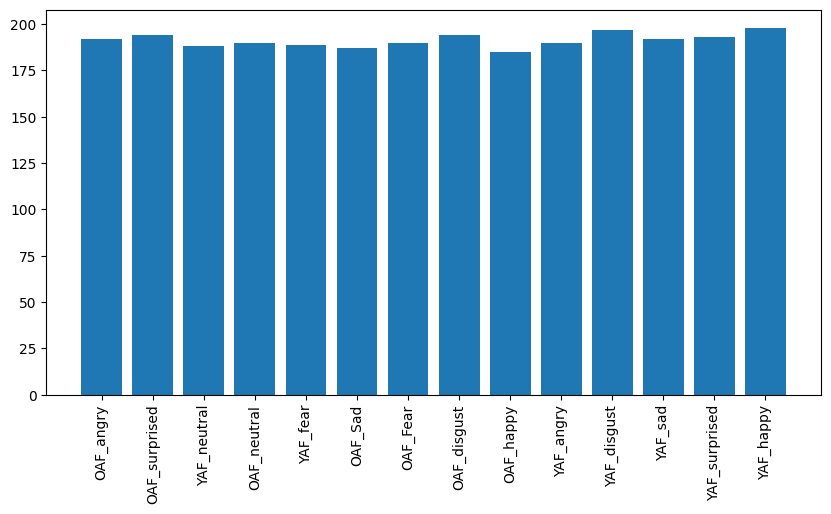

In [ ]:
# YOUR CODE HERE

# Visualize Tess Data Labels

plt.figure(figsize=(10,5))
from collections import Counter
tess_label = []

for idx in range(len(tess_data)):
  tess_label.append(tess_data[idx].split('/')[1])
tess_label_cnts = Counter(tess_label)

plt.bar(tess_label_cnts.keys(), tess_label_cnts.values())
plt.xticks(rotation = 90)
plt.show()

In [ ]:
sum(tess_label_cnts.values())

2679

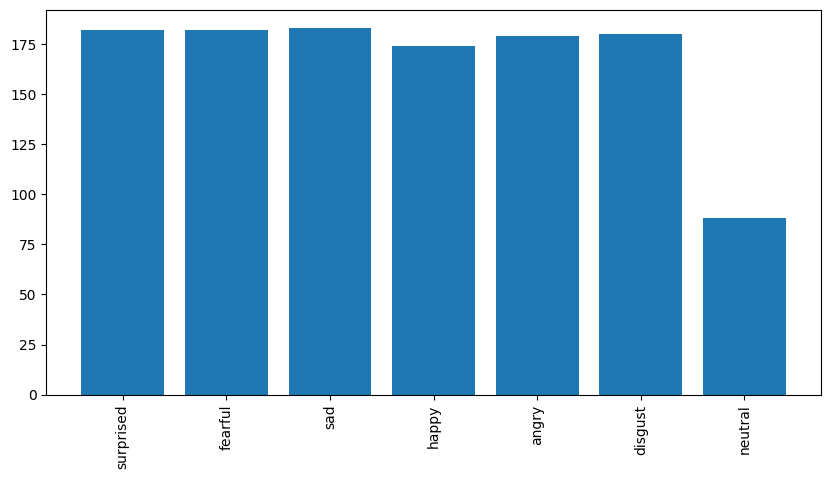

In [ ]:
# Visualize Ravdess data labels
# Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised)
from collections import Counter
ravdess_emotions = {'01':'neutral', '02':'calm', '03':'happy', '04':'sad', '05':'angry', '06':'fearful', '07':'disgust', '08':'surprised'}
plt.figure(figsize=(10,5))

ravdess_label = []

for idx in range(len(ravdess_data)):
  ravdess_label.append(ravdess_emotions[ravdess_data[idx].split('/')[2].split('-')[2]])
ravdess_label_cnts = Counter(ravdess_label)
plt.bar(ravdess_label_cnts.keys(), ravdess_label_cnts.values())
plt.xticks(rotation = 90)
plt.show()

#### Visualize sample audio signal using librosa

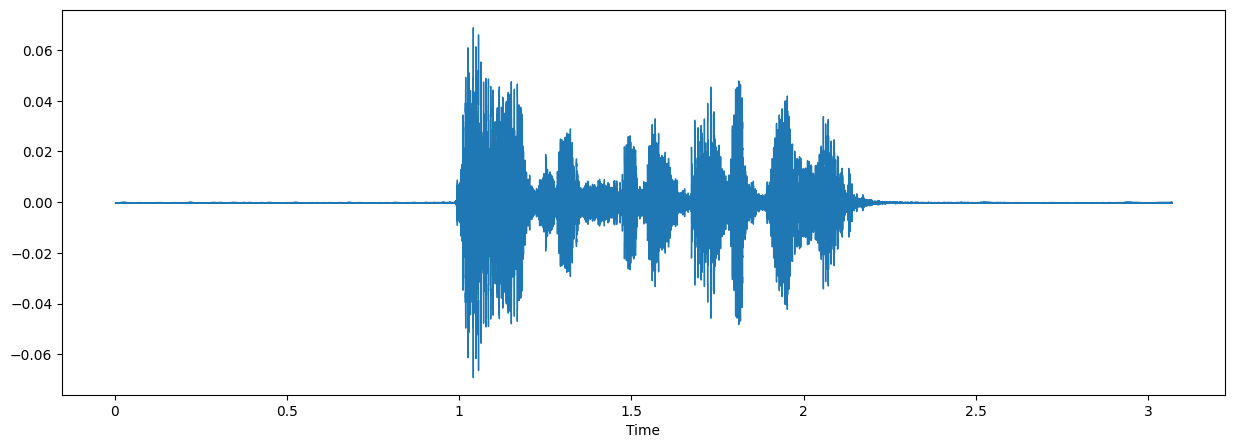

In [ ]:
# YOUR CODE HERE
# librosa is used for analyzing and extracting features of an audio signal

sample_audio_path = ravdess_data[0]

data, sampling_rate = librosa.load(sample_audio_path)
plt.figure(figsize=(15, 5))

# librosa.display.waveshow is used to plot waveform of amplitude vs time
librosa.display.waveshow(data, sr=sampling_rate)
plt.show()

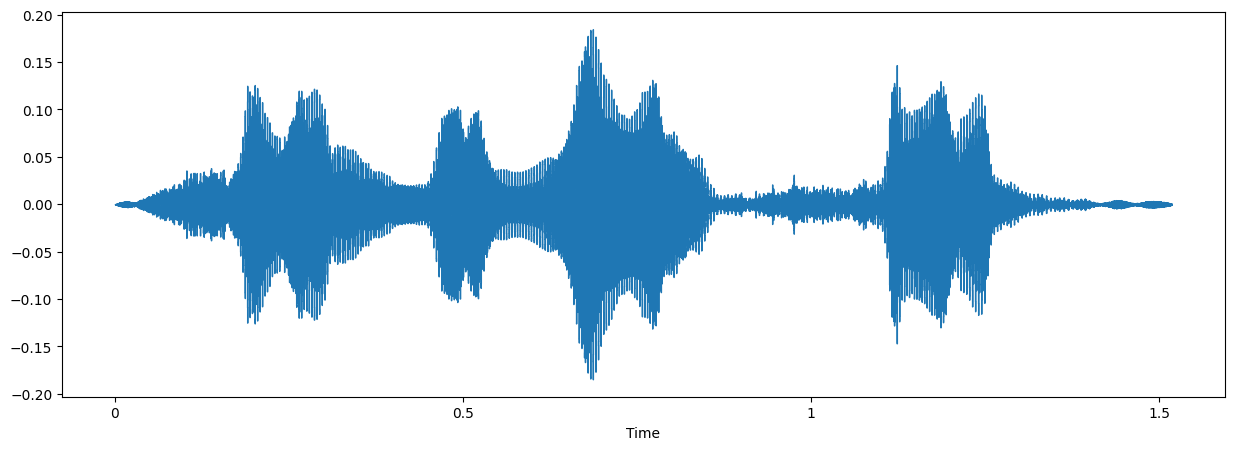

In [ ]:
sample_audio_path = tess_data[0]

data, sampling_rate = librosa.load(sample_audio_path)
plt.figure(figsize=(15, 5))

# librosa.display.waveshow is used to plot waveform of amplitude vs time
librosa.display.waveshow(data, sr=sampling_rate)
plt.show()

### Feature extraction (2 points)

Read one WAV file at a time using `Librosa`. An audio time series in the form of a 1-dimensional array for mono or 2-dimensional array for stereo, along with time sampling rate (which defines the length of the array), where the elements within each of the arrays represent the amplitude of the sound waves is returned by `librosa.load()` function. Refer to the supplementary notebook ('Audio feature extraction')

To know more about Librosa, explore the [link](https://librosa.org/doc/latest/feature.html)

In [ ]:
# YOUR CODE HERE
def extract_feature(file_name):
    # load audio
    X, sample_rate = librosa.load(file_name)
    # apply stft()
    stft=np.abs(librosa.stft(X))
    result=np.array([])
    # compute mfcc
    mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0)
    # combine the features
    result=np.hstack((result, mfccs))
    # compute chroma features and combine
    chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
    result=np.hstack((result, chroma))
    # compute melspectrogram and combine
    mel=np.mean(librosa.feature.melspectrogram(y=X, sr=sample_rate).T,axis=0)
    result=np.hstack((result, mel))
    return result

#### Create a dictionary or a function to encode the emotions

In [ ]:
# YOUR CODE HERE
tess_emotions = {'YAF_neutral':'neutral', 'OAF_neutral':'neutral', 'YAF_disgust':'disgust', 'OAF_disgust':'disgust',
                 'YAF_fear':'fearful', 'OAF_Fear':'fearful', 'YAF_angry':'angry', 'OAF_angry':'angry',
                 'YAF_surprised':'surprised', 'OAF_surprised':'surprised',
                 'YAF_sad':'sad', 'OAF_Sad':'sad', 'YAF_happy':'happy', 'OAF_happy':'happy'}
ravdess_emotions = {'01':'neutral', '02':'calm', '03':'happy', '04':'sad', '05':'angry',
                    '06':'fearful', '07':'disgust', '08':'surprised'}

#### TESS data feature extraction

In [ ]:
# YOUR CODE HERE

features_tess, labels_tess = [], []

for idx, wv_file in enumerate(tess_data):
  features_tess.append(extract_feature(wv_file))
  # extracting label
  emt = tess_data[idx].split('/')[1]
  labels_tess.append(tess_emotions[emt])

In [ ]:
len(features_tess), len(labels_tess)

(2679, 2679)

In [ ]:
print(features_tess[0:2])
print(labels_tess[0:2])

#### Ravdess data feature extraction

In [ ]:
# YOUR CODE HERE
features_ravdess, labels_ravdess = [], []

for idx, wv_file in enumerate(ravdess_data):
  features_ravdess.append(extract_feature(wv_file))
  # extracting label
  emt = ravdess_data[idx].split('/')[2].split('-')[2]
  labels_ravdess.append(ravdess_emotions[emt])

In [ ]:
len(features_ravdess), len(labels_ravdess)

(1168, 1168)

In [ ]:
print(features_ravdess[0:2])
print(labels_ravdess[0:2])

[array([-6.63987061e+02,  6.87473679e+01, -1.79485168e+01,  1.93900604e+01,
       -5.18192434e+00, -1.47874343e+00, -6.52807236e+00, -2.01591229e+00,
       -1.07596273e+01, -9.33047593e-01, -1.28093791e+00, -3.18926573e+00,
        2.16625977e+00, -3.53412342e+00,  1.53182960e+00, -1.07241440e+00,
       -1.67002642e+00, -4.13705540e+00,  1.60322320e+00, -1.58798766e+00,
       -7.28924096e-01, -1.16542459e+00, -3.46127367e+00,  1.11558670e-02,
       -1.84963512e+00,  1.82907355e+00, -5.53747594e-01,  1.46987784e+00,
       -3.94789606e-01,  1.51578772e+00,  2.22512388e+00,  2.05046129e+00,
        4.14194918e+00,  2.00015259e+00,  4.40432596e+00,  1.19385636e+00,
        1.04936755e+00, -4.57941778e-02,  1.56083715e+00,  2.86550045e+00,
        7.17091024e-01,  6.91369474e-01,  6.82594061e-01,  7.22168446e-01,
        7.47727156e-01,  7.50607371e-01,  7.63565958e-01,  7.69394577e-01,
        7.93329775e-01,  7.94406950e-01,  7.29635596e-01,  6.85847223e-01,
        2.45990832e-05, 

#### Save the features

It is best advised to save the features in dataframe and maintain so that feature extraction step is not required to be performed every time.

* Make a DataFrame with features and labels

* Write dataframe into `.CSV` file and save it offline.

In [ ]:
# YOUR CODE HERE
tess_df = pd.DataFrame(features_tess)
tess_df['target_emotion'] = labels_tess

ravdess_df = pd.DataFrame(features_ravdess)
ravdess_df['target_emotion'] = labels_ravdess

final_df = pd.concat([tess_df, ravdess_df], axis =0, ignore_index=True)

final_df.to_csv("emotion_data.csv", index=False)

In [ ]:
final_df.index

RangeIndex(start=0, stop=3847, step=1)

#### Split the data into train and test

In [ ]:
# YOUR CODE HERE
X = final_df.drop('target_emotion', axis =1)
y = final_df['target_emotion'].values
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

print("train size: ", len(Xtrain))
print("test size: ", len(Xtest))

train size:  3077
test size:  770


### Train the model with TESS + Ravdess data (2 points)

* Apply different ML algorithms (eg. DecisionTree, RandomForest, etc.) and find the model with best performance

In [ ]:
# YOUR CODE HERE
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

import xgboost as xgb
import lightgbm as lgb

scaler = StandardScaler()
Xtrain_scaled = scaler.fit_transform(Xtrain)
Xtest_scaled = scaler.transform(Xtest)

# LR model
clf_lr = LogisticRegression(multi_class='ovr')
clf_lr.fit(Xtrain_scaled, ytrain)
ytest_pred_lr = clf_lr.predict(Xtest_scaled)

accuracy_lr = accuracy_score(ytest, ytest_pred_lr)
print("Accuracy of LR model on test data: ", accuracy_lr)

# RF model
clf_rf = RandomForestClassifier()
clf_rf.fit(Xtrain_scaled, ytrain)
ytest_pred_rf = clf_rf.predict(Xtest_scaled)

accuracy_rf = accuracy_score(ytest, ytest_pred_rf)
print("Accuracy of RF model on test data: ", accuracy_rf)

# DT model
clf_dt = DecisionTreeClassifier()
clf_dt.fit(Xtrain_scaled, ytrain)
ytest_pred_dt = clf_dt.predict(Xtest_scaled)


accuracy_dt = accuracy_score(ytest, ytest_pred_dt)
print("Accuracy of DT model on test data: ", accuracy_dt)


# LightGBM model
clf_lgbm = lgb.LGBMClassifier()
clf_lgbm.fit(Xtrain_scaled, ytrain)
ytest_pred_lgbm = clf_lgbm.predict(Xtest_scaled)

accuracy_lgbm = accuracy_score(ytest, ytest_pred_lgbm)
print("Accuracy of LightGBM model on test data: ", accuracy_lgbm)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import lightgbm as lgb
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Assuming you have Xtrain_scaled, ytrain, Xtest_scaled, and ytest

# Define the parameter grid for LightGBM
lgbm_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
}

# Create LightGBM classifier
clf_lgbm = lgb.LGBMClassifier()

# Create GridSearchCV instance for LightGBM
grid_search_lgbm = GridSearchCV(clf_lgbm, lgbm_param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search_lgbm.fit(Xtrain_scaled, ytrain)

# Get the best LightGBM model
best_lgbm_model = grid_search_lgbm.best_estimator_

# Predict on the test set using the best model
ytest_pred_lgbm = best_lgbm_model.predict(Xtest_scaled)

# Calculate accuracy
accuracy_lgbm = accuracy_score(ytest, ytest_pred_lgbm)
print("Accuracy of LightGBM model on test data: ", accuracy_lgbm)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.020731 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 45900
[LightGBM] [Info] Number of data points in the train set: 3077, number of used features: 180
[LightGBM] [Info] Start training from score -1.956364
[LightGBM] [Info] Start training from score -1.909218
[LightGBM] [Info] Start training from score -1.907027
[LightGBM] [Info] Start training from score -1.913613
[LightGBM] [Info] Start training from score -2.091539
[LightGBM] [Info] Start training from score -1.935886
[LightGBM] [Info] Start training from score -1.920243
[Light

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import lightgbm as lgb
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Assuming you have Xtrain_scaled, ytrain, Xtest_scaled, and ytest

# Define the parameter grid for LightGBM
lgbm_param_grid = {
    'n_estimators': [100, 150],
    'max_depth': [3, 5],
    'learning_rate': [0.1, 1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
}

# Create LightGBM classifier
clf_lgbm = lgb.LGBMClassifier()

# Create GridSearchCV instance for LightGBM
grid_search_lgbm = GridSearchCV(clf_lgbm, lgbm_param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search_lgbm.fit(Xtrain_scaled, ytrain)

# Get the best LightGBM model
best_lgbm_model = grid_search_lgbm.best_estimator_

# Predict on the test set using the best model
ytest_pred_lgbm = best_lgbm_model.predict(Xtest_scaled)

# Calculate accuracy
accuracy_lgbm = accuracy_score(ytest, ytest_pred_lgbm)
print("Accuracy of LightGBM model on test data: ", accuracy_lgbm)


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ytest_pred_rf))


              precision    recall  f1-score   support

       angry       0.92      0.87      0.89       126
     disgust       0.81      0.85      0.83       115
     fearful       0.88      0.85      0.86       104
       happy       0.85      0.85      0.85       103
     neutral       0.95      0.92      0.93        86
         sad       0.85      0.89      0.87       118
   surprised       0.83      0.86      0.85       118

    accuracy                           0.87       770
   macro avg       0.87      0.87      0.87       770
weighted avg       0.87      0.87      0.87       770



#### Apply the voting classifier

In [ ]:
# YOUR CODE HERE
vc = VotingClassifier(estimators=[('lr', clf_lr), ('rf', clf_rf), ('dt', clf_dt)], voting='soft')

vc.fit(Xtrain_scaled, ytrain)

ytest_pred_vc = vc.predict(Xtest_scaled)

accuracy_vc = accuracy_score(ytest, ytest_pred_vc)
print("Accuracy of VC model on test data: ", accuracy_vc)


Accuracy of VC model on test data:  0.8038961038961039


### Train the model with TESS + Ravdess + Team recorded data (4 points)

* Record the audio samples (team data), extract features and combine with TESS + Ravdess data features
  - Record and gather all the team data samples with proper naming convention in separate folder

    **Hint:** Follow the supplementary notebook to record team data

  - Each team member must record 2 samples for each emotion (Use similar sentences as given in TESS data)

* Train the different ML algorithms and find the model with best performance

#### Load the team data

In [ ]:
# YOUR CODE HERE
team_data = glob.glob("team_audio/*.wav")
print("Team Audio Data Length: ",len(team_data))

print(team_data[0])
import IPython.display as ipd
ipd.Audio(team_data[0])

Team Audio Data Length:  0


IndexError: ignored

In [ ]:
team_data

#### Extracting features of team data and combine with TESS + Ravdess

In [ ]:
# YOUR CODE HERE
features_team, labels_team = [], []

for idx, wv_file in enumerate(team_data):
  features_team.append(extract_feature(wv_file))
  # extracting label
  emt = team_data[idx].split('/')[1].split('_')[2].split('.')[0]
  labels_team.append(emt)

In [ ]:
labels_team

In [ ]:
#Load Kaggle test data

kaggle_test_data = glob.glob("/content/Kaggle_TestSet/*.wav")
print("Kaggle Audio Data Length: ",len(kaggle_test_data))

print(kaggle_test_data[0])
import IPython.display as ipd
ipd.Audio(kaggle_test_data[0])

Kaggle Audio Data Length:  201
/content/Kaggle_TestSet/93.wav


In [ ]:
kaggle_test_data

In [ ]:
# Code for Kaggle Test Data Set
features_kaggle_test_data = []
kaggle_id=[]
file_name=[]

for idx, wv_file in enumerate(kaggle_test_data):
  features_kaggle_test_data.append(extract_feature(wv_file))
  #kaggle_id.append(wv_file.split('.')[0])
  kaggle_id.append(os.path.splitext(os.path.basename(wv_file))[0].split('_')[-1])
  file_name.append(wv_file)

In [ ]:
kaggle_id[110], file_name[110]

('194', '/content/Kaggle_TestSet/194.wav')

In [ ]:
# YOUR CODE HERE
kaggle_test_data_df = pd.DataFrame(features_kaggle_test_data)


In [ ]:
kaggle_id_int=[int(x) for x in kaggle_id]

In [ ]:
kaggle_test_data_df['Id']=kaggle_id_int

In [ ]:
kaggle_test_data_df

In [ ]:
kaggle_test_data_df_sorted=kaggle_test_data_df.sort_values('Id')

In [ ]:
kaggle_test_data_df_sorted

In [ ]:
# clf_rf.fit(Xtrain, ytrain)
# ytest_pred_rf = clf_rf.predict(Xtest)

In [ ]:
kaggle_test_data_df.shape

(201, 181)

In [ ]:
kaggle_test_data_df_sorted_test=kaggle_test_data_df_sorted.drop('Id',axis=1)
kaggle_test_data_df_sorted_test_scaled=scaler.transform(kaggle_test_data_df_sorted_test)

In [ ]:
kaggle_test_data_df_sorted_test_scaled.shape

(201, 180)

In [ ]:
# LightGBM model

ytest_pred_lgbm_kaggle = best_lgbm_model.predict(kaggle_test_data_df_sorted_test_scaled)
# print(len(ytest_pred_lgbm_kaggle))
# submission_df=pd.DataFrame()

# kaggle_id_int=[int(x) for x in kaggle_id]
# submission_df['Id'] = kaggle_id_int
# submission_df['Label'] = ytest_pred_lgbm_kaggle
# submission_df=submission_df.sort_values('Id')

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


In [ ]:
kaggle_test_data_df_sorted_test=kaggle_test_data_df_sorted.drop('Id',axis=1)
kaggle_test_data_df_sorted_test_scaled=scaler.transform(kaggle_test_data_df_sorted_test)

In [ ]:
ytest_pred_lgbm_kaggle_rf = best_lgbm_model.predict(kaggle_test_data_df_sorted_test_scaled)
print(len(ytest_pred_lgbm_kaggle_rf))
submission_df=pd.DataFrame()
submission_df['Id'] = kaggle_test_data_df_sorted.Id
submission_df['Label'] = ytest_pred_lgbm_kaggle_rf


# clf_rf.fit(Xtrain, ytrain)
# ytest_pred_rf = clf_rf.predict(Xtest)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
201


In [ ]:
submission_df

In [ ]:
submission_df.to_csv('Group9_Submission_LGBM_NEW7_Sorted.csv',index=False)

#### Train the different ML algorithms

In [ ]:
# YOUR CODE HERE
team_audio_df = pd.DataFrame(features_team)
team_audio_df['target_emotion'] = labels_team

final_d_team = pd.concat([tess_df, ravdess_df, team_audio_df], axis =0, ignore_index=True)

X = final_d_team.drop('target_emotion', axis =1)
y = final_d_team['target_emotion'].values
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

print("train size: ", len(Xtrain))
print("test size: ", len(Xtest))

scaler = StandardScaler()
Xtrain_scaled = scaler.fit_transform(Xtrain)
Xtest_scaled = scaler.transform(Xtest)

# LR model
clf_lr = LogisticRegression(multi_class='ovr')
clf_lr.fit(Xtrain_scaled, ytrain)
ytest_pred_lr = clf_lr.predict(Xtest_scaled)

accuracy_lr = accuracy_score(ytest, ytest_pred_lr)
print("Accuracy of LR model on test data: ", accuracy_lr)

# RF model
clf_rf = RandomForestClassifier()
clf_rf.fit(Xtrain_scaled, ytrain)
ytest_pred_rf = clf_rf.predict(Xtest_scaled)

accuracy_rf = accuracy_score(ytest, ytest_pred_rf)
print("Accuracy of RF model on test data: ", accuracy_rf)

# DT model
clf_dt = DecisionTreeClassifier()
clf_dt.fit(Xtrain_scaled, ytrain)
ytest_pred_dt = clf_dt.predict(Xtest_scaled)

accuracy_dt = accuracy_score(ytest, ytest_pred_dt)
print("Accuracy of DT model on test data: ", accuracy_dt)

train size:  3110
test size:  778
Accuracy of LR model on test data:  0.8084832904884319
Accuracy of RF model on test data:  0.8573264781491002
Accuracy of DT model on test data:  0.7365038560411311


#### Test the best working model with live audio recording

In [ ]:
# choose the best working model and assign below
MODEL = clf_rf

{'01':'neutral', '02':'calm', '03':'happy', '04':'sad', '05':'angry', '06':'fearful', '07':'disgust', '08':'surprised'}

In [ ]:
#@title Speak the utterance and test
from IPython.display import Javascript
from google.colab import output
from base64 import b64decode
emotions = {'01':'neutral', '02':'calm', '03':'happy', '04':'sad', '05':'angry', '06':'fearful', '07':'disgust', '08':'surprised'}
RECORD = """
const sleep  = time => new Promise(resolve => setTimeout(resolve, time))
const b2text = blob => new Promise(resolve => {
  const reader = new FileReader()
  reader.onloadend = e => resolve(e.srcElement.result)
  reader.readAsDataURL(blob)
})
var record = time => new Promise(async resolve => {
  stream = await navigator.mediaDevices.getUserMedia({ audio: true })
  recorder = new MediaRecorder(stream)
  chunks = []
  recorder.ondataavailable = e => chunks.push(e.data)
  recorder.start()
  await sleep(time)
  recorder.onstop = async ()=>{
    blob = new Blob(chunks)
    text = await b2text(blob)
    resolve(text)
  }
  recorder.stop()
})
"""

if not os.path.exists('ModelTesting/'):
    os.mkdir("ModelTesting/")
def record(sec=3):
    print("Start speaking!")
    now = datetime.now()
    current_time = now.strftime("%Y-%m-%d_%H-%M-%S")
    display(Javascript(RECORD))
    s = output.eval_js('record(%d)' % (sec*1000))
    b = b64decode(s.split(',')[1])
    with open('ModelTesting/audio_'+current_time+'.wav','wb') as f:
        f.write(b)
    return 'ModelTesting/audio_'+current_time+'.wav'
test_i = record()
pred = MODEL.predict(extract_feature(test_i).reshape(1,-1))
idx_emotion = list(emotions.values()).index(pred[0])
print(list(emotions.keys())[idx_emotion])
ipd.Audio(test_i)

Start speaking!


<IPython.core.display.Javascript object>

03


### Report Analysis

- Report the accuracy for 10 live samples using the model trained on TESS+Ravdess+Team data
- Discuss with the team mentor regarding deep learnt audio features. Read a related article [here](https://ieeexplore.ieee.org/stamp/stamp.jsp?arnumber=8805181).
